# DAI-101 Data Science
## FIFA 23 Player Stats Exploratory Data Analysis

**Name:** Sarthak Gaur   
**Branch:** Chemical Engineering   
**Enrollment No.:** 23321026   
**Sub-Batch:** CH-3 



---

## Introduction

**What is EDA?**  
Exploratory Data Analysis (EDA) is the process of examining data sets to summarize their main characteristics—often with visual methods. It helps uncover patterns, detect anomalies, and test hypotheses before applying more formal statistical techniques.

This notebook provides an exploratory data analysis (EDA) of the FIFA 23 Player Stats dataset obtained from Kaggle. Our primary objectives are:

- **Univariate Analysis:** Examine individual variables (e.g., Overall Rating, Market Value, Player Position).
- **Multivariate (Bivariate) Analysis:** Investigate relationships between two or more variables (e.g., Overall Rating vs. Market Value, Age vs. Overall Rating).

Through this analysis, we aim to uncover key trends and insights that can inform decisions or further analysis in the sports domain.

---

---

## Data Overview & Cleaning

### Objectives:
- **Load and inspect** the dataset.
- **Identify missing values** and understand the data structure.

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#This is a magic command used in Jupyter Notebook. It ensures that plots are displayed inside the notebook instead of a separate window.
%matplotlib inline 

sns.set(style="whitegrid")
plt.style.use("ggplot")

df = pd.read_csv("FIFA23_official_data.csv")

print("Dataset Shape:", df.shape)
print("Columns:", df.columns.tolist())
df.head()

Dataset Shape: (17660, 29)
Columns: ['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight', 'Release Clause', 'Kit Number', 'Best Overall Rating']


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,Real Face,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause,Kit Number,Best Overall Rating
0,209658,L. Goretzka,27,https://cdn.sofifa.net/players/209/658/23_60.png,Germany,https://cdn.sofifa.net/flags/de.png,87,88,FC Bayern München,https://cdn.sofifa.net/teams/21/30.png,...,Yes,"<span class=""pos pos28"">SUB","Jul 1, 2018",NaN,2026,189cm,82kg,€157M,8.0,NaN
1,212198,Bruno Fernandes,27,https://cdn.sofifa.net/players/212/198/23_60.png,Portugal,https://cdn.sofifa.net/flags/pt.png,86,87,Manchester United,https://cdn.sofifa.net/teams/11/30.png,...,Yes,"<span class=""pos pos15"">LCM","Jan 30, 2020",NaN,2026,179cm,69kg,€155M,8.0,NaN
2,224334,M. Acuña,30,https://cdn.sofifa.net/players/224/334/23_60.png,Argentina,https://cdn.sofifa.net/flags/ar.png,85,85,Sevilla FC,https://cdn.sofifa.net/teams/481/30.png,...,No,"<span class=""pos pos7"">LB","Sep 14, 2020",NaN,2024,172cm,69kg,€97.7M,19.0,NaN
3,192985,K. De Bruyne,31,https://cdn.sofifa.net/players/192/985/23_60.png,Belgium,https://cdn.sofifa.net/flags/be.png,91,91,Manchester City,https://cdn.sofifa.net/teams/10/30.png,...,Yes,"<span class=""pos pos13"">RCM","Aug 30, 2015",NaN,2025,181cm,70kg,€198.9M,17.0,NaN
4,224232,N. Barella,25,https://cdn.sofifa.net/players/224/232/23_60.png,Italy,https://cdn.sofifa.net/flags/it.png,86,89,Inter,https://cdn.sofifa.net/teams/44/30.png,...,Yes,"<span class=""pos pos13"">RCM","Sep 1, 2020",NaN,2026,172cm,68kg,€154.4M,23.0,NaN


In [239]:
print(df.columns)

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Joined', 'Loaned From', 'Contract Valid Until', 'Height', 'Weight',
       'Release Clause', 'Kit Number', 'Best Overall Rating'],
      dtype='object')


---
### Cleaning Financial Data (Wage, Value, Release Clause)

#### Why Clean the Data First?  
The financial columns (**Wage, Value, Release Clause**) contain symbols (€) and abbreviations (K = thousand, M = million), making them **non-numeric**. If not cleaned, we **cannot perform calculations, correlations, or visualizations** on them.

#### Solution  
We convert these values into proper numbers by:  
✅ Removing `€` symbols  
✅ Replacing `"K"` with `000` and `"M"` with `000000`  
✅ Converting them to **float** for numerical analysis  

This ensures that **our visualizations and statistical analysis are accurate**.  


In [241]:
def convert_currency(value):
    """
    Convert FIFA-style currency values (€115K, €2.3M) into numerical values.
    """
    if isinstance(value, str):  
        value = value.replace('€', '').replace('K', '000').replace('M', '000000')  # Remove € and expand K/M
        return float(value)  
    return np.nan  

df['Wage'] = df['Wage'].apply(convert_currency)
df['Value'] = df['Value'].apply(convert_currency)
df['Release Clause'] = df['Release Clause'].apply(convert_currency)

df[['Wage', 'Value', 'Release Clause']].head()


,Wage,Value,Release Clause
0,115000.0,91000000.0,157000000.0
1,190000.0,78.5,155000000.0
2,46000.0,46.5,97.7
3,350000.0,107.5,198.9
4,110000.0,89.5,154.4


---
## Initial Data Check
Check for missing values and review the data types to understand what cleaning might be needed.

### Handling Missing Data in FIFA 23 Dataset

#### Why Handle Missing Data?
Missing values can affect the accuracy of our analysis and visualizations. We use different techniques to **fill missing values** based on the type of data.

#### Techniques Used:
- **Mean, Median, and Mode Imputation** for numerical data.
- **Forward Fill (ffill) & Backward Fill (bfill)** for categorical data.
- **Median & Regression Imputation** for financial columns.

After applying these methods, our dataset is now **clean and complete**, ready for further analysis.

In [243]:
print(df.isnull().sum())
df.info()

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                          211
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause               1151
Kit Number                     35
Best Overall Rating         17639
dtype: int64
<

In [245]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Only display columns with NaN values
print(missing_values)

Club                      211
Body Type                  38
Real Face                  38
Position                   35
Joined                   1098
Loaned From             16966
Contract Valid Until      361
Release Clause           1151
Kit Number                 35
Best Overall Rating     17639
dtype: int64


---
### Handling Missing Values in Numerical Columns

Numerical values like **Overall, Wage, and Skill Moves** need different imputation methods:  
- **Mean Imputation** (for Overall) → Best for normally distributed data.  
- **Median Imputation** (for Wage) → Works well for skewed data with outliers.  
- **Mode Imputation** (for Skill Moves) → Replaces with the most common value.  





In [292]:
df['Overall'].fillna(df['Overall'].mean(), inplace=True)

df['Wage'].fillna(df['Wage'].median(), inplace=True)

df['Skill Moves'].fillna(df['Skill Moves'].mode()[0], inplace=True)

---

### Handling Missing Values in Categorical Columns  

For **Club, Work Rate, and Nationality**, we use:  
- **Mode Imputation (Club)** → Assigns the most frequent club.  
- **Forward Fill (Work Rate)** → Assumes the previous value is similar.  
- **Backward Fill (Nationality)** → Uses the next row’s value when missing.  


In [294]:
df['Club'].fillna(df['Club'].mode()[0], inplace=True)

df['Work Rate'].fillna(method='ffill', inplace=True)

df['Nationality'].fillna(method='bfill', inplace=True)

---
### Handling Missing Values in Financial Columns  

**Wage, Value, and Release Clause** require:  
- **Median Imputation (Wage & Value)** → Handles outliers better than mean.  
- **Regression Imputation (Release Clause)** → Estimated as **Value × 1.1** since Release Clause is usually slightly higher than Value.  


In [296]:
df['Wage'].fillna(df['Wage'].median(), inplace=True)
df['Value'].fillna(df['Value'].median(), inplace=True)

df['Release Clause'].fillna(df['Value'] * 1.1, inplace=True)  # Assuming a 10% higher value

In [254]:
print(df.isnull().sum())

ID                              0
Name                            0
Age                             0
Photo                           0
Nationality                     0
Flag                            0
Overall                         0
Potential                       0
Club                            0
Club Logo                       0
Value                           0
Wage                            0
Special                         0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                      38
Real Face                      38
Position                       35
Joined                       1098
Loaned From                 16966
Contract Valid Until          361
Height                          0
Weight                          0
Release Clause                  0
Kit Number                     35
Best Overall Rating         17639
dtype: int64


---
## Univariate Analysis

### 1. Summary Statistics

We begin by understanding the basic statistical properties of the numerical features. This includes measures such as mean, median, standard deviation, and range.

*The following code displays a summary of the dataset's numerical features.*

---

In [256]:
df.describe()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Release Clause,Kit Number
count,17660.000000,17660.000000,17660.000000,17660.000000,1.766000e+04,17660.000000,17660.000000,17660.000000,17660.000000,17660.000000,1.766000e+04,17625.000000
mean,246319.424462,23.127746,63.369592,70.981200,1.218437e+06,8189.807475,1537.915855,1.106285,2.900340,2.297169,7.802757e+05,25.037957
std,31487.892861,4.639821,8.036268,6.529836,5.393557e+06,20476.733001,285.893809,0.407021,0.663523,0.754264,5.321420e+06,19.154116
min,16.000000,15.000000,43.000000,42.000000,0.000000e+00,0.000000,749.000000,1.000000,1.000000,1.000000,0.000000e+00,1.000000
25%,240732.500000,20.000000,58.000000,67.000000,3.700000e+00,550.000000,1387.000000,1.000000,3.000000,2.000000,2.400000e+00,11.000000
50%,257041.000000,22.000000,63.000000,71.000000,2.500000e+05,2000.000000,1548.000000,1.000000,3.000000,2.000000,2.995000e+01,22.000000
75%,263027.500000,26.000000,69.000000,75.000000,5.500000e+05,6000.000000,1727.000000,1.000000,3.000000,3.000000,5.400000e+05,32.000000
max,271340.000000,54.000000,91.000000,95.000000,1.480000e+08,450000.000000,2312.000000,5.000000,5.000000,5.000000,2.610000e+08,99.000000


In [258]:
df['Age'].value_counts()

Age
20    1970
19    1937
21    1871
22    1686
18    1442
23    1240
24    1091
25     936
26     801
27     692
17     677
28     608
29     528
30     475
31     385
32     314
33     245
34     207
16     154
35     146
36     104
37      68
38      28
39      28
40      13
41       7
42       3
54       1
44       1
43       1
15       1
Name: count, dtype: int64

In [260]:
df['Overall'].value_counts()

Overall
60    978
62    932
63    918
64    903
61    897
65    806
59    774
58    734
66    671
57    647
67    646
56    600
68    576
55    568
53    530
69    520
54    514
70    502
72    463
52    444
75    422
71    416
73    387
51    350
74    333
50    332
76    308
77    211
78    193
79    190
49    155
80    136
48    116
81    114
82     84
84     63
47     60
83     51
85     27
86     22
46     16
87     14
88     11
89     10
90      5
91      5
44      3
45      2
43      1
Name: count, dtype: int64

---
### 2. Visualizations for Individual Variables

#### a. Distribution of Overall Ratings

This histogram shows how player overall ratings are distributed. It helps identify whether the ratings are skewed or normally distributed.

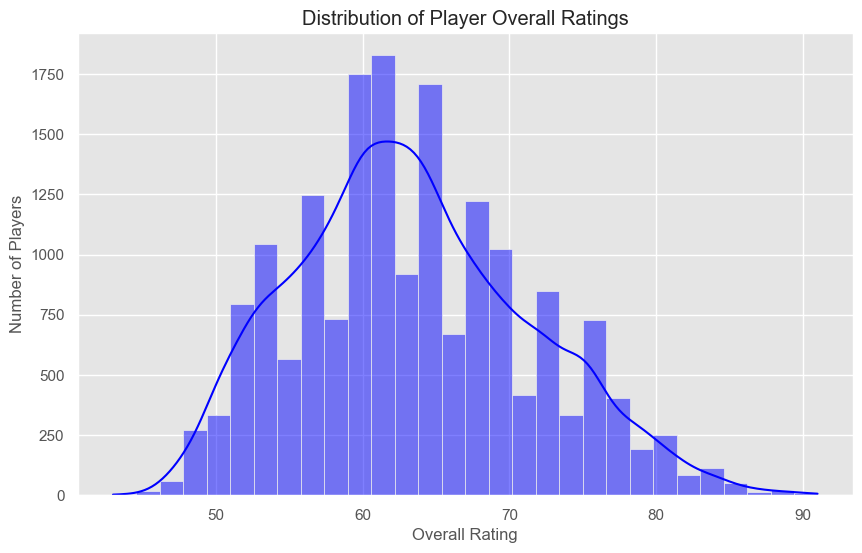

In [262]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Overall'], bins=30, kde=True, color='blue')
plt.title("Distribution of Player Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Number of Players")
plt.show()

---
#### b. Player Market Value Distribution

A boxplot is used to visualize the spread and detect any outliers in player market values.

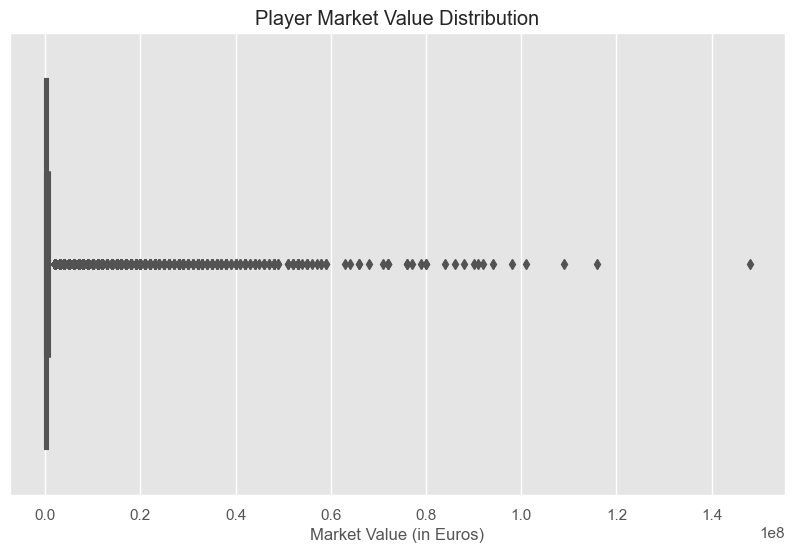

In [266]:
def convert_value(value):
    value = value.replace("€", "").replace("M", "000000").replace("K", "000")
    return float(value)

df["Value"] = df["Value"].astype(str).apply(convert_value)

plt.figure(figsize=(10, 6))

sns.boxplot(x=df['Value'])
plt.title("Player Market Value Distribution")
plt.xlabel("Market Value (in Euros)")
plt.show()

---
#### c. Distribution of Nationality of Players

This count plot shows the frequency of different player's different national, giving insight into the composition of the dataset.


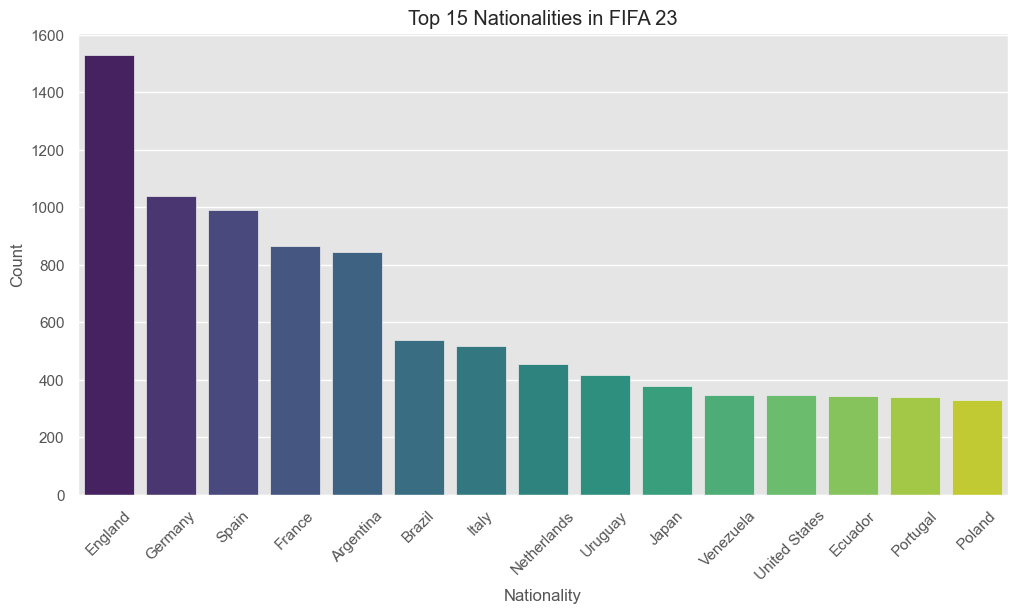

In [268]:
plt.figure(figsize=(12, 6))
order = df['Nationality'].value_counts().index[:15]  # Top 15 nationalities
sns.countplot(data=df, x='Nationality', order=order, palette='viridis')
plt.title("Top 15 Nationalities in FIFA 23")
plt.xlabel("Nationality")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

---
## Multivariate (Bivariate) Analysis

### 1. Relationship Between Overall Rating and Market Value

This scatter plot examines the relationship between player overall ratings and their market values. We color-code the points based on player positions to see if certain positions drive this relationship.

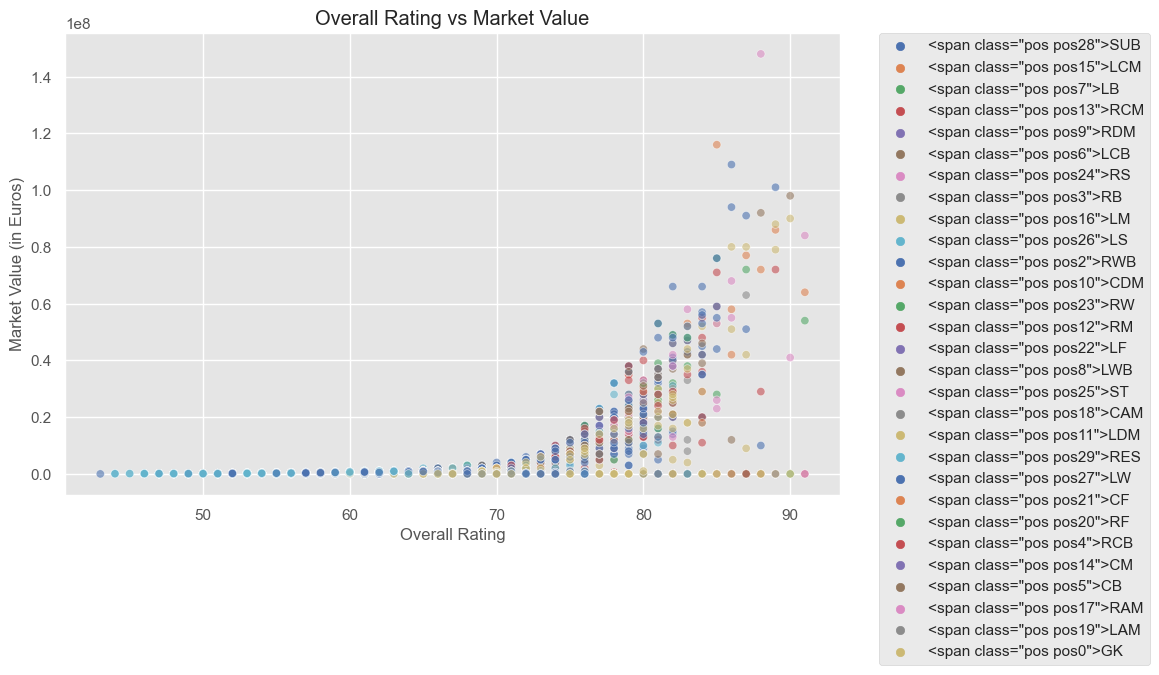

In [270]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Overall', y='Value', hue='Position', alpha=0.6, palette='deep')
plt.title("Overall Rating vs Market Value")
plt.xlabel("Overall Rating")
plt.ylabel("Market Value (in Euros)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

---
### 2. Age vs. Overall Rating Analysis

A regression plot is used to explore whether a player's age correlates with their overall rating. This can hint at the impact of experience on performance.

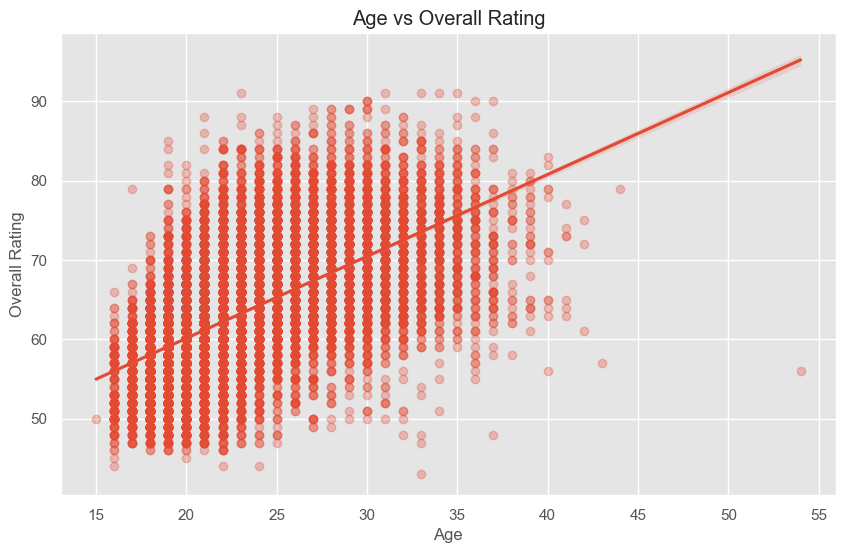

In [272]:
plt.figure(figsize=(10, 6))
sns.regplot(x=df['Age'], y=df['Overall'], scatter_kws={'alpha':0.3})
plt.title("Age vs Overall Rating")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()

---
### 3. Correlation Heatmap

The heatmap below displays the correlations between various player attributes such as **Overall Rating, Potential, Age, Wage, Weak Foot, Skill Moves, and International Reputation**. This visualization helps identify which attributes are strongly related and how they influence each other.  

For example:  
- A high correlation between **Overall Rating** and **Potential** suggests that top-rated players often have high future potential.  
- The relationship between **Wage** and **Overall Rating** can indicate whether higher-rated players earn more.  
- The correlation between **Skill Moves** and **International Reputation** might suggest that globally recognized players tend to have better technical skills.


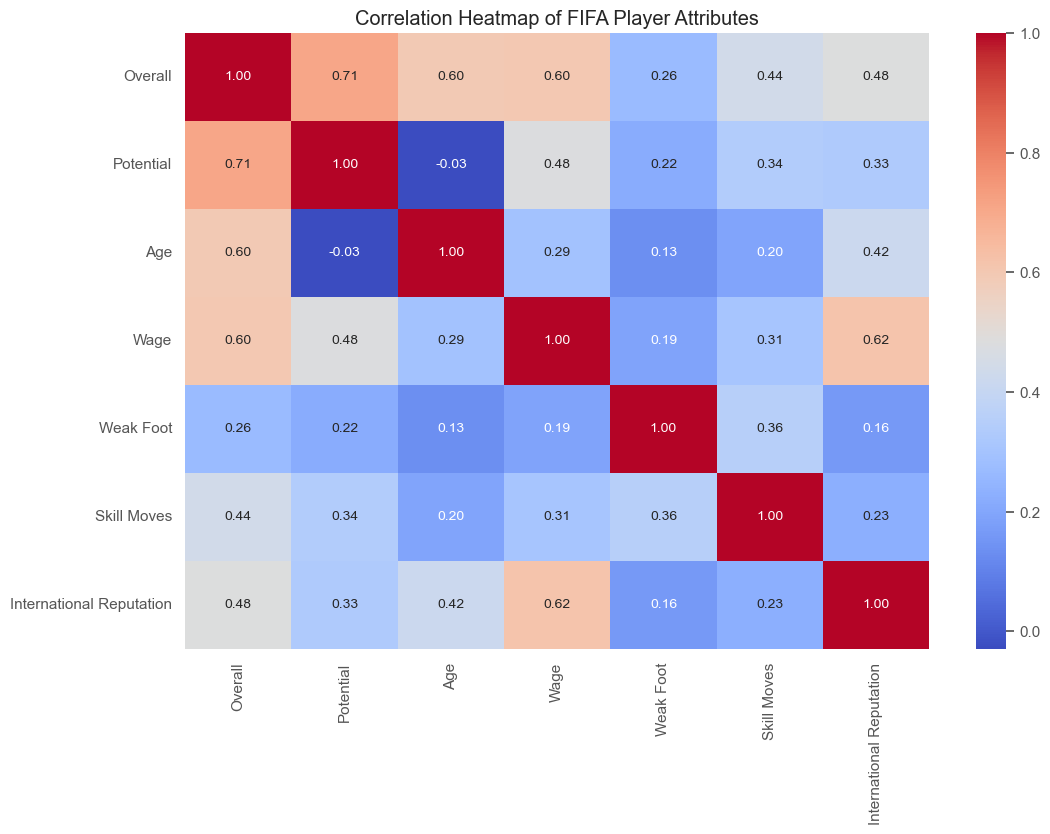

In [274]:

numerical_cols = ['Overall', 'Potential', 'Age', 'Wage', 'Weak Foot', 'Skill Moves', 'International Reputation']
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of FIFA Player Attributes")
plt.show()


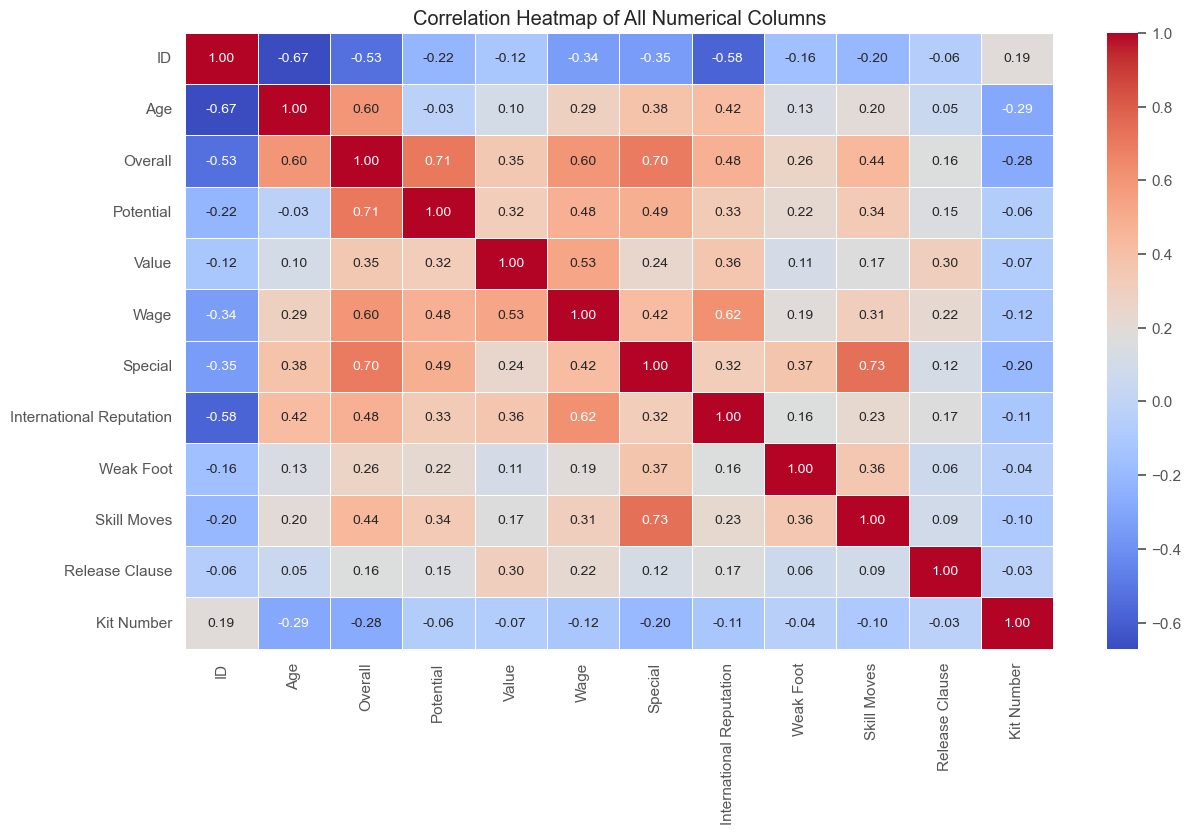

In [306]:
numerical_cols = df.select_dtypes(include=[np.number])

plt.figure(figsize=(14, 8))
sns.heatmap(numerical_cols.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of All Numerical Columns")
plt.show()


---
## Additional Insights

### 1. Analysis by Nationality

Grouping players by their nationality, we can identify which countries have the highest average overall ratings. This may reflect national training quality or other cultural factors in football.

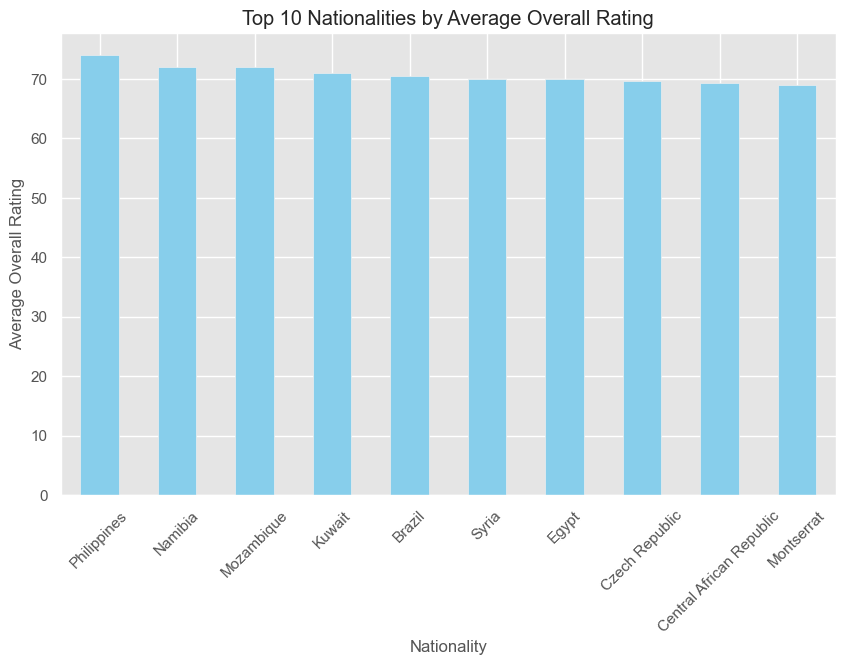

In [278]:
avg_rating_by_nationality = df.groupby('Nationality')['Overall'].mean().sort_values(ascending=False).head(10)
avg_rating_by_nationality.plot(kind='bar', color='skyblue', figsize=(10,6))
plt.title("Top 10 Nationalities by Average Overall Rating")
plt.xlabel("Nationality")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=45)
plt.show()


---
### 2. Analysis by Club

Similarly, we analyze player ratings across clubs to see which teams consistently have top-rated players.

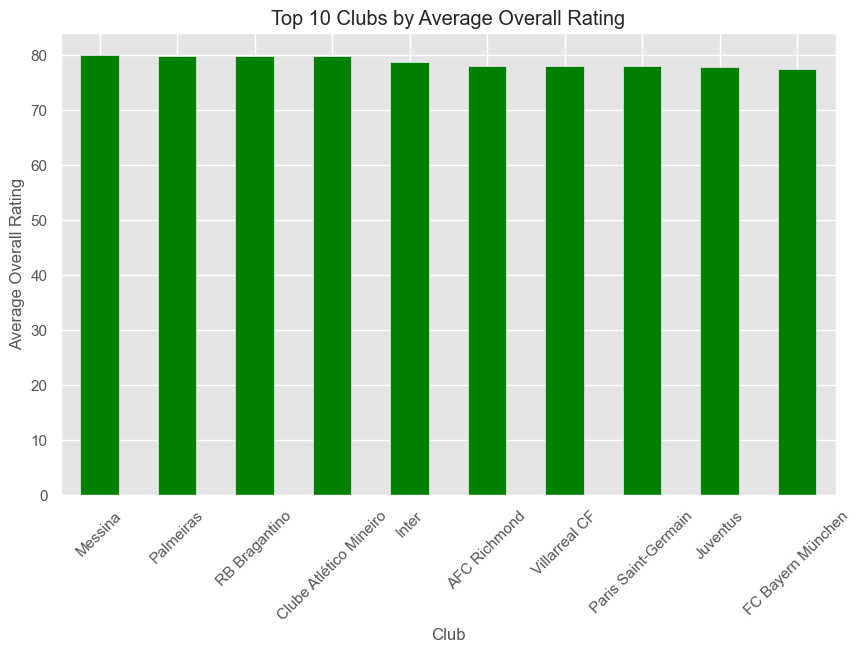

In [280]:
top_clubs = df.groupby('Club')['Overall'].mean().sort_values(ascending=False).head(10)
top_clubs.plot(kind='bar', color='green', figsize=(10,6))
plt.title("Top 10 Clubs by Average Overall Rating")
plt.xlabel("Club")
plt.ylabel("Average Overall Rating")
plt.xticks(rotation=45)
plt.show()


---
### 3 Analysis by Work Rate  

#### Why Work Rate?  
Work Rate defines a player's attacking and defensive effort (e.g., High/High, Low/Low).  

#### Objective  
We analyze how Work Rate affects Overall Rating to see if highly active players have better ratings.  

#### Key Insights  
- Do High/High players have higher ratings?  
- Are Low/Low players rated lower?  
- Which Work Rate is most common among top players?  

This helps understand player effectiveness based on playing style.  
ing style**.


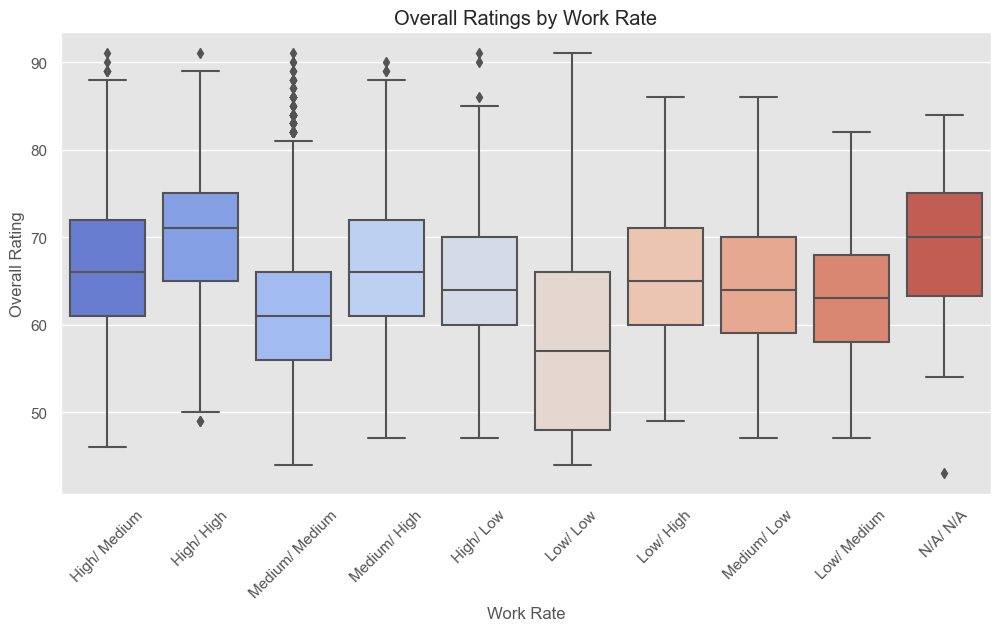

In [283]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Work Rate', y='Overall', data=df, palette='coolwarm')
plt.title("Overall Ratings by Work Rate")
plt.xlabel("Work Rate")
plt.ylabel("Overall Rating")
plt.xticks(rotation=45)
plt.show()

---
---
## Conclusions

**Key Findings:**

- **Overall Ratings & Market Value:** Players with higher overall ratings generally command higher market values.
- **Nationality & Club Analysis:** Certain nationalities and clubs are associated with higher average player ratings.
- **Position-Based Trends:** Forwards tend to have higher pace and shooting skills, while defenders excel in physicality and defending.
- **Age Factor:** There is a moderate relationship between age and overall rating, suggesting experience may influence performance.

These insights not only meet the assignment requirements but also provide a comprehensive view of the dataset.

---

## Final Thoughts

This EDA serves as a foundation for deeper analysis. Future work could explore predictive modeling or clustering to further segment players based on their attributes. 

**Thank you for reviewing this analysis!**
